 ### Times of Times of India

In [1]:
import pandas as pd
pd.options.display.max_columns = 50
import numpy as np
import datetime as dt

### Number of articles per issue (by pub_date/year/weekday)

In [2]:
df = pd.read_csv("toi_parsed_all.csv.gz", usecols = ["AlphaPubDate", "ObjectType", "NumericPubDate"], low_memory = False)
df.shape

(7210598, 3)

In [3]:
df['date'] = pd.to_datetime(df['NumericPubDate'], format='%Y%m%d')
df['year'] = pd.DatetimeIndex(df['date']).year
df['dow']  = df['date'].dt.day_name()

In [4]:
df['date'].nunique()

47294

In [5]:
n_date = df.groupby('date').size()
n_year = df.groupby('year').size()
n_dow  = df.groupby('dow').size()

In [6]:
n_year.head()

year
1838     918
1839    5690
1840    6117
1841    6002
1842    6029
dtype: int64

<AxesSubplot:xlabel='year'>

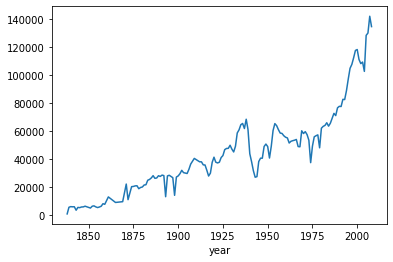

In [7]:
n_year.plot()

<AxesSubplot:xlabel='dow'>

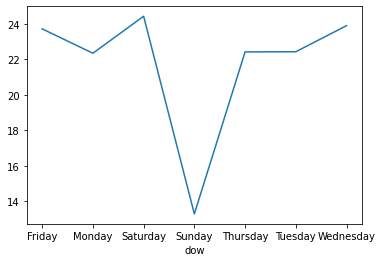

In [8]:
(n_dow/df['date'].nunique()).plot()

### Number of (classified) ads

In [9]:
df['ObjectType'].value_counts(dropna = False)

['Feature', 'Article']                           3387722
['Classified Advertisement', 'Advertisement']    1265909
Advertisement                                     718627
General Information                               394231
Front Page/Cover Story                            268025
['Editorial', 'Commentary']                       147855
['Article', 'Feature']                            138382
Credit/Acknowledgement                            133291
['Letter to the Editor', 'Correspondence']        125309
Stock Quote                                        95525
News                                               86768
Image/Photograph                                   86614
Illustration                                       71710
Obituary                                           63824
['News', 'Military/War News']                      57468
Review                                             42624
Birth Notice                                       41597
['News', 'Marriage Announcement

<AxesSubplot:xlabel='year'>

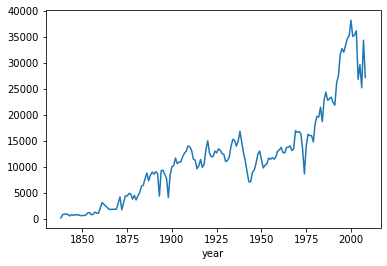

In [10]:
df['ad'] = df['ObjectType'].str.contains('Advertisement')

n_ad_year = df[df['ad'] == True].groupby('year').size()
n_ad_year.plot()

<AxesSubplot:xlabel='year'>

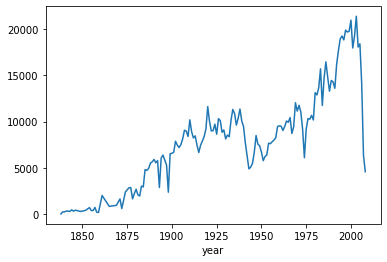

In [11]:
df['c_ad'] = df['ObjectType'].str.contains('Classified Advertisement')
df[df['c_ad'] == True].groupby('year').size().plot()